In [22]:
#1
# Numpy import for numerical operations
import numpy as np

# Pandas import for data manipulatoin
import pandas as pd

# Statsmodels import for statistical Modeling
import statsmodels.api as sm

# Importing statistical tests tools from Statsmodels library
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# Importing Matplotlib for plotting
import matplotlib.pyplot as plt

# Importing Seaborn for advanced data visualization
import seaborn as sns

In [23]:
#2
# Reading csv file into a dataframe named df
df = pd.read_csv('./regression_data/diamond.csv')
print(df.head())

   carat      cut color clarity  price     x     y     z
0   0.23    Ideal     E     SI2    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1    326  3.89  3.84  2.31
2   0.23     Good     E     VS1    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2    334  4.20  4.23  2.63
4   0.31     Good     J     SI2    335  4.34  4.35  2.75


In [24]:
#3
# Displaying summary of df dataframe
print(df.describe())

              carat         price             x             y             z
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940   3932.799722      5.731157      5.734526      3.538734
std        0.474011   3989.439738      1.121761      1.142135      0.705699
min        0.200000    326.000000      0.000000      0.000000      0.000000
25%        0.400000    950.000000      4.710000      4.720000      2.910000
50%        0.700000   2401.000000      5.700000      5.710000      3.530000
75%        1.040000   5324.250000      6.540000      6.540000      4.040000
max        5.010000  18823.000000     10.740000     58.900000     31.800000


In [25]:
# Displaying datatypes for each variables in df dataframe
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
price        int64
x          float64
y          float64
z          float64
dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

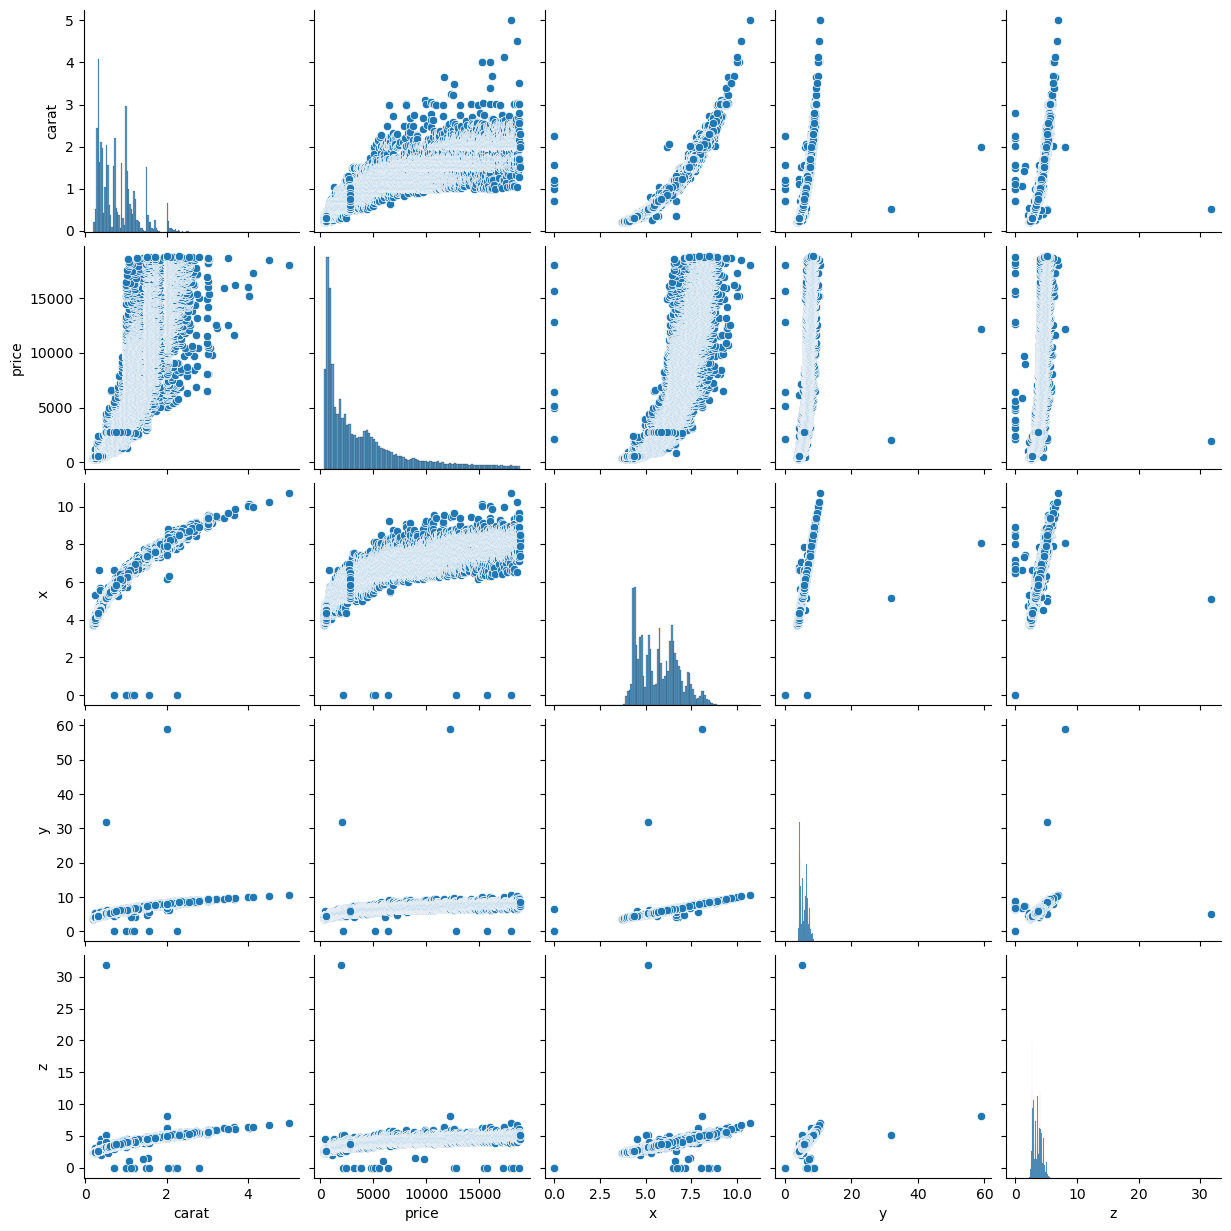

In [26]:
# 4
# Pair plotting to visualize relationships among variables
sns.pairplot(df)

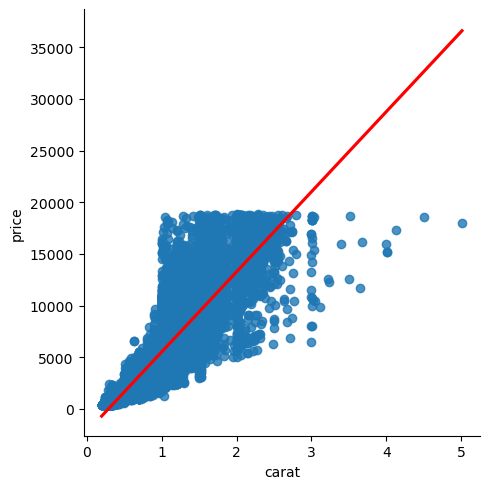

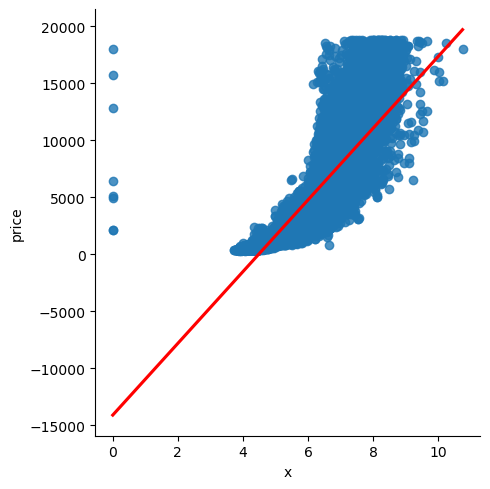

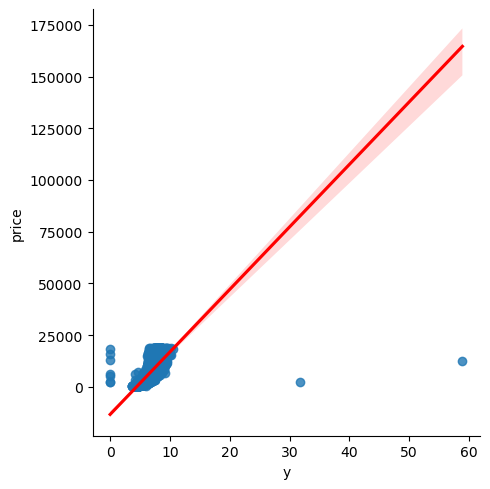

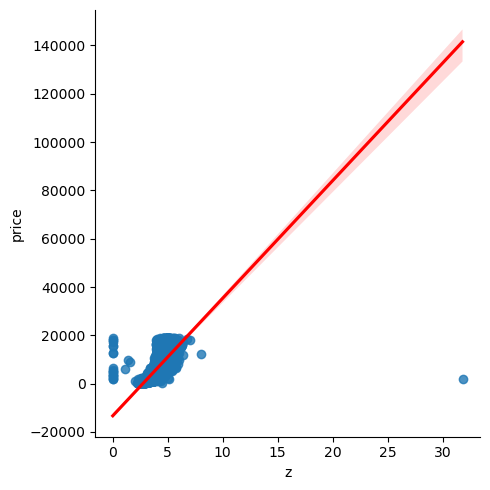

In [6]:
# 5

# Setting dependent variable and independent variables
dependent_var = "price"
independent_vars = ["carat", "x", "y", "z"]

# Plotting each independent variable against the dependent variable using loop
for var in independent_vars: # var represents a single item from independent_vars
    sns.lmplot(x=var, y=dependent_var, data=df, line_kws={'color': 'red'} )
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.show()

In [27]:
# OLS regression using price as dependent variable and others as independent variable
model = sm.OLS.from_formula('price ~ carat + x + y + z', df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:21:44   Log-Likelihood:            -4.7187e+05
No. Observations:               53940   AIC:                         9.437e+05
Df Residuals:                   53935   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1921.1740    104.373     18.407      0.000    1716.601    2125.747
carat       1.023e+04     62.937    162.607      0.000    1.01e+04    1.04e+04
x           -884.2091     40.470    -21.848      0.000    -963.532    -804.887
y            166.0384     25.858      6.421      0.000     115.356     216.721
z           -576.2035     39.282    -14.668      0.000    -653.197    -499.210
==============================================================================
Omnibus:                    14400.324   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336485.128
Skew:                           0.743   Prob(JB):                         0.00
Kurtosis:                      15.145   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Data redesign for Ordinal datasets
# Ordinal Mapping for column Clarity
new_df = pd.read_csv('./regression_data/diamond.csv')
clarity_ordinal_mapping = {'SI1': 1, 'SI2': 2, 'VS1': 3, 'VS2': 4, 'VVS1': 5, 'VVS2': 6,  'I1': 7, 'IF': 8}
new_df['clarity'] = new_df['clarity'].map(clarity_ordinal_mapping)

# Ordinal Mapping for column Cut
cut_ordinal_mapping = {'Fair': 10, 'Good': 20, 'Very Good': 30, 'Premium': 40, 'Ideal': 50}
new_df['cut'] = new_df['cut'].map(cut_ordinal_mapping)

# Checking if effect is applied
new_df.head(10)

,carat,cut,color,clarity,price,x,y,z
0,0.23,50,E,2,326,3.95,3.98,2.43
1,0.21,40,E,1,326,3.89,3.84,2.31
2,0.23,20,E,3,327,4.05,4.07,2.31
3,0.29,40,I,4,334,4.20,4.23,2.63
4,0.31,20,J,2,335,4.34,4.35,2.75
5,0.24,30,J,6,336,3.94,3.96,2.48
6,0.24,30,I,5,336,3.95,3.98,2.47
7,0.26,30,H,1,337,4.07,4.11,2.53
8,0.22,10,E,4,337,3.87,3.78,2.49
9,0.23,30,H,3,338,4.00,4.05,2.39


In [29]:
# 6
# Linear regression model first (1)
# Using price as the dependent variable
# and carat, x, y, z, clarity, cut as independent variables
indep_vars_1 = new_df[['carat', 'x', 'y', 'z', 'clarity', 'cut']]
indep_vars_1 = sm.add_constant(indep_vars_1)
dep_var_1 = new_df['price']

model_1 = sm.OLS(dep_var_1, indep_vars_1)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 5.873e+04
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:23:05   Log-Likelihood:            -4.6931e+05
No. Observations:               53940   AIC:                         9.386e+05
Df Residuals:                   53933   BIC:                         9.387e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -591.7555    105.316     -5.619      0.000    -798.175    -385.336
carat       1.001e+04     60.376    165.796      0.000    9891.770    1.01e+04
x           -790.6212     38.843    -20.354      0.000    -866.755    -714.488
y            139.8219     24.667      5.668      0.000      91.474     188.170
z           -352.6848     37.701     -9.355      0.000    -426.580    -278.790
clarity      201.0509      3.498     57.477      0.000     194.195     207.907
cut           22.2595      0.573     38.868      0.000      21.137      23.382
==============================================================================
Omnibus:                    11534.080   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           440884.863
Skew:                           0.203   Prob(JB):                         0.00
Kurtosis:                      17.000   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Linear regression model 2nd
# Using price as the dependent variable
# and carat, x and y as independent variables
indep_vars_2 = new_df[['carat', 'x', 'y']]
indep_vars_2 = sm.add_constant(indep_vars_2)
dep_var_2 = new_df['price']

model_2 = sm.OLS(dep_var_2, indep_vars_2)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:23:12   Log-Likelihood:            -4.7197e+05
No. Observations:               53940   AIC:                         9.440e+05
Df Residuals:                   53936   BIC:                         9.440e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1719.5301    103.669     16.587      0.000    1516.337    1922.723
carat       1.012e+04     62.562    161.727      0.000    9995.364    1.02e+04
x          -1148.6055     36.307    -31.636      0.000   -1219.767   -1077.444
y            126.0026     25.765      4.890      0.000      75.503     176.502
==============================================================================
Omnibus:                    14008.515   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           316848.828
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                      14.787   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Linear regression model 3rd
# Using price as the dependent variable
# and carat, clarity, cut as independent variables
indep_vars_3 = new_df[['carat', 'clarity', 'cut']]
indep_vars_3 = sm.add_constant(indep_vars_3)
dep_var_3 = new_df['price']

model_3 = sm.OLS(dep_var_3, indep_vars_3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.145e+05
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:16:38   Log-Likelihood:            -4.6991e+05
No. Observations:               53940   AIC:                         9.398e+05
Df Residuals:                   53936   BIC:                         9.399e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4030.1213     29.061   -138.678      0.000   -4087.081   -3973.161
carat       8020.7859     13.784    581.871      0.000    7993.768    8047.804
clarity      218.8162      3.497     62.575      0.000     211.962     225.670
cut           22.0359      0.575     38.317      0.000      20.909      23.163
==============================================================================
Omnibus:                    10937.934   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           226192.761
Skew:                           0.437   Prob(JB):                         0.00
Kurtosis:                      12.994   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# 7
# Gathering r-squared, adjacent r-squared, AIC and BIC values for comparision
rsquared_1 = result_1.rsquared
adj_rsquared_1 = result_1.rsquared_adj
aic_1 = result_1.aic
bic_1 = result_1.bic

rsquared_2 = result_2.rsquared
adj_rsquared_2 = result_2.rsquared_adj
aic_2 = result_2.aic
bic_2 = result_2.bic

rsquared_3 = result_3.rsquared
adj_rsquared_3 = result_3.rsquared_adj
aic_3 = result_3.aic
bic_3 = result_3.bic

In [32]:
# Comparing 3 different models and displaying the info
models = ["model_1", "model_2", "model_3"]
r_squared = [rsquared_1, rsquared_2, rsquared_3]
adj_r_squared = [adj_rsquared_1, adj_rsquared_2, adj_rsquared_3]
aic = [aic_1, aic_2, aic_3]
bic = [bic_1, bic_2, bic_3]

data = {
    "Model" : models,
    "R-squared": r_squared,
    "Adjusted R_squared": adj_r_squared,
    "AIC": aic,
    "BIC": bic
}
df_stats = pd.DataFrame(data)
df_stats

,Model,R-squared,Adjusted R_squared,AIC,BIC
0,model_1,0.867260,0.867245,938640.661724,938702.931117
1,model_2,0.853496,0.853488,943956.120414,943991.702924
2,model_3,0.864301,0.864294,939823.666188,939859.248699


In [118]:
# Model 1 has highest R-squared value meaning it has most variance in the dependent variable.
# This means it holds strong predective power than other models
# Thus model 1 is the best among others.

In [120]:
# 8
# Variance Inflation Factor (VIF) to check indepedent check multicollinearity among independent variable 
vif_data = pd.DataFrame()
vif_data["Feature"] = indep_vars_1.columns
vif_data["VIF"] = [variance_inflation_factor(indep_vars_1.values, i) for i in range(indep_vars_1.shape[1])]
print("Variance Inflation Factor (VIF) for Model 1:")
print(vif_data)


Variance Inflation Factor (VIF) for Model 1:
   Feature         VIF
0    const  283.153106
1    carat   20.909122
2        x   48.468920
3        y   20.263176
4        z   18.070972
5  clarity    1.089518
6      cut    1.043915


In [16]:
# High multicolinearity among X, Y, Z and Carat is discovered
# Inorder to proceed further, Ordinal datasets like Clarity and Cut were also converted into numeric form and added into the model


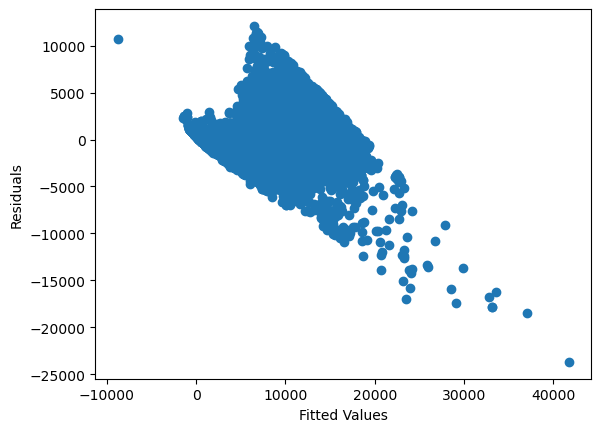

In [44]:
# 9
# Scatteredplot with residuals on Y and predicted values on X
y_hat = result_1.fittedvalues # Predicted values from the model
e = result_1.resid
plt.scatter(y_hat, e)
plt.xlabel('Fitted Values')  # Label for x-axis
plt.ylabel('Residuals')  # Label for y-axis
plt.show()

(array([1.0000e+00, 6.0000e+00, 1.1000e+01, 3.2000e+01, 1.2100e+02,
        1.6580e+03, 4.7231e+04, 4.2930e+03, 5.4700e+02, 4.0000e+01]),
 array([-23691.54621639, -20111.56750139, -16531.58878639, -12951.61007139,
         -9371.63135639,  -5791.65264139,  -2211.67392639,   1368.30478861,
          4948.28350361,   8528.26221861,  12108.24093361]),
 <BarContainer object of 10 artists>)

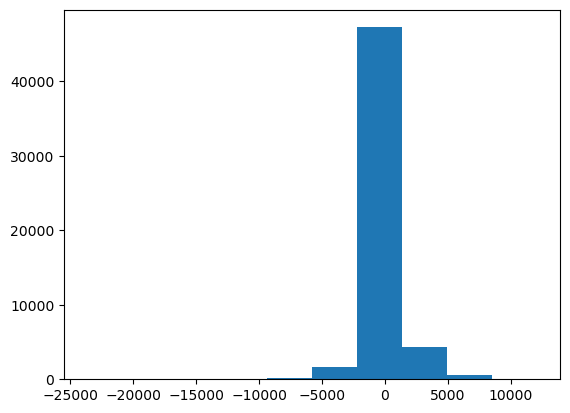

In [34]:
# 10
# Plotting residuals in histogram to check if normally distributed or not
plt.hist(e)

In [19]:
# The residual distribution pattern is normal 

In [35]:
# 11
# BP test for heteroskedasticity
bp_test = sms.het_breuschpagan(e, result_1.model.exog)
print("BP Test P-Value: ", bp_test[3])

alpha = 0.05
if bp_test[3] < alpha:
    print("There is significant heteroskedasticity.")
else:
    print("There is not enough heteroskedasticity.")

BP Test P-Value:  0.0
There is significant heteroskedasticity.


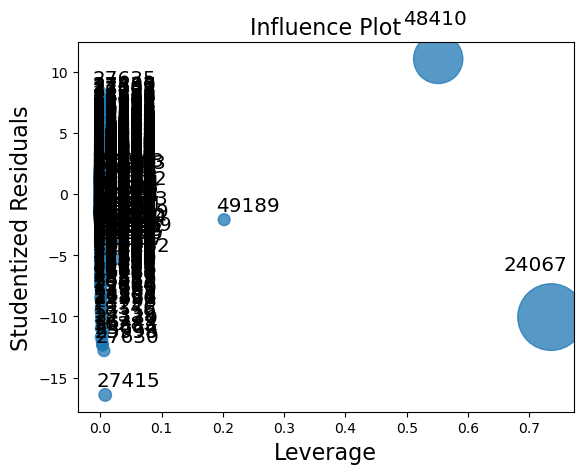

In [37]:
# 12
# Influence plot to identify influential data points based on Cook's distance
sm.graphics.influence_plot(result_1, criterioin = "cooks")
plt.show()

In [ ]:
#  The dataset appears to have some problematic points since there is presence of some high leverage points: 24067 and 48410 as well as some outliners 27415 and 49189

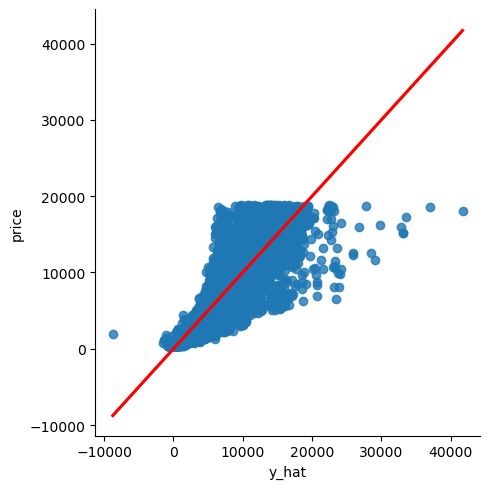

In [42]:
# 13
# Adding predicted values (y_hat) to the DataFrame 
# Plotting the relationship with actual prices
# Visualize the fit of the model.
new_df["y_hat"] = y_hat
sns.lmplot(x="y_hat", y="price", data=new_df, fit_reg=True, line_kws={'color': 'red'})

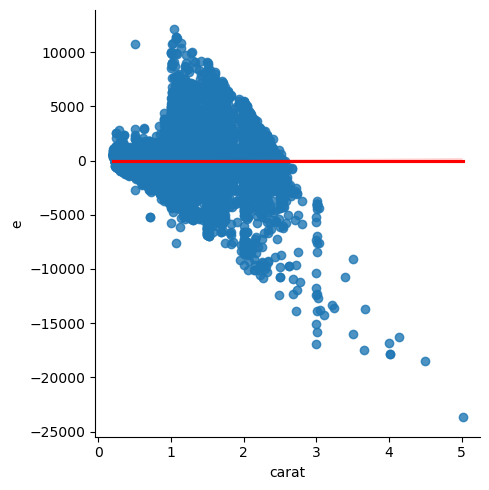

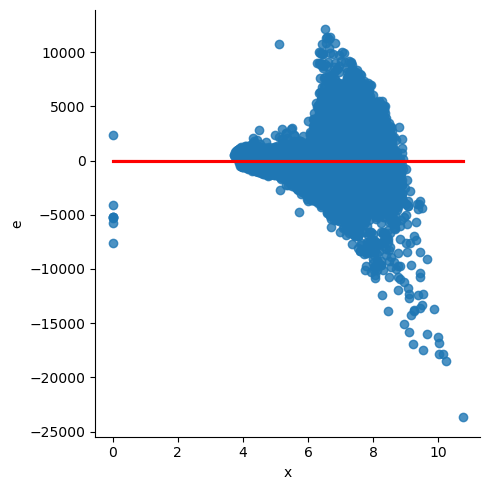

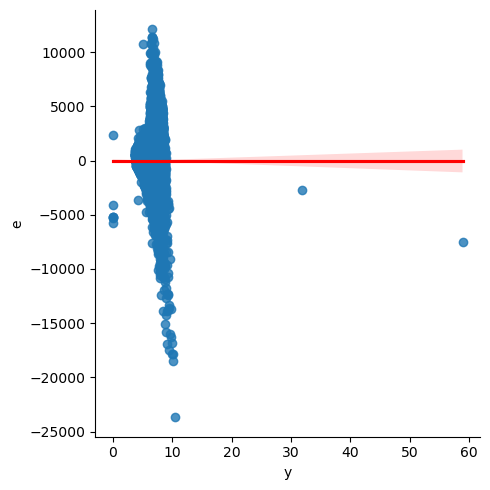

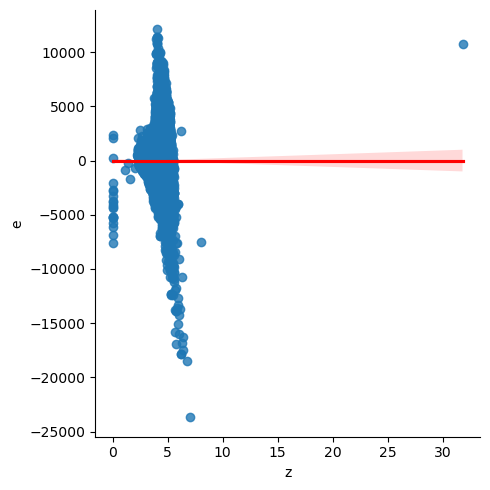

In [90]:
# 14
# Adding residuals (e) to the dataframe
new_df["e"] = e

# Plotting residuals against each independent variable using loop
for i in independent_vars:
    sns.lmplot(x=i, y="e", fit_reg=True, data=new_df, line_kws={'color': 'red'})
    plt.show()

In [70]:
# The plots dont indicate problematic pattern since data are tightly clustured
# however few datapoints are spread away which indicate a little problematic

In [117]:
# 15
# Creating hypothetical dataframe hypo_df
# Predecting price using fitted model
hypo_df = pd.DataFrame({
    "const": [1, 1, 1, 1, 1],
    "carat":[0.47, 0.29, 0.31, 0.21, 0.33],
    "x":[4.20, 3.94, 3.45, 2.65, 3.00],
    "y":[4.0, 3.49, 3.54, 2.56, 3.11],
    "z":[2.35, 2.55, 2.45, 2.30, 2.40],
    "clarity":[2, 3, 4, 1, 3],
    "cut":[20, 45, 30, 50, 40],
})

# Adding result to the hypo_df
hypo_df["est_price"] = result_1.predict(hypo_df)
hypo_df

,const,carat,x,y,z,clarity,cut,est_price
0,1,0.47,4.20,4.00,2.35,2,20,1370.155922
1,1,0.29,3.94,3.49,2.55,3,45,389.590245
2,1,0.31,3.45,3.54,2.45,4,30,886.614759
3,1,0.21,2.65,2.56,2.30,1,50,276.015640
4,1,0.33,3.00,3.11,2.40,3,40,1421.651429
